<h1><center>GMDL, HW4</center></h1>
<h4><center>Pan Eyal, Ilana Pervoi</center></h4>

# Undirected Factor Graph of Student Example

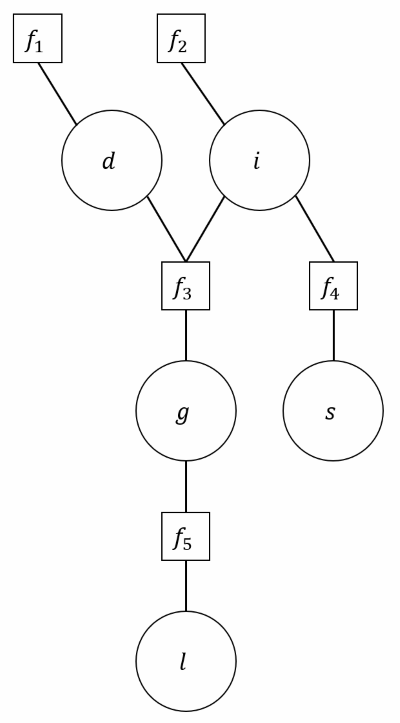

## Sum-Product Algorithem (=Belief Propagation)

In [1]:
import numpy as np
import itertools

In [2]:
# p(d) table
f1 = np.array([0.6, 0.4])

# p(i) table
f2 = np.array([0.7, 0.3])

# p(g|d,i) table -> [i,d,g] indexed
f3 = np.array([[[0.3 , 0.4 , 0.3],
                [0.05, 0.25, 0.7]],
               [[0.9 , 0.08, 0.02],
                [0.5 , 0.3 , 0.2]]])

# p(s|i) table -> [i,s] indexed
f4 = np.array([[0.95, 0.05],
               [0.2 , 0.8]])

# p(l|g) table -> [g,l] indexed
f5 = np.array([[0.1 , 0.9],
               [0.4 , 0.6],
               [0.99, 0.01]])

### P(i)

In [3]:
f1_to_d = f1
d_to_f3 = f1_to_d

l_to_f5 = 1
f5_to_g = np.zeros(3)
for l in range(2):
  f5_to_g[0] += f5[0,l] * l_to_f5
  f5_to_g[1] += f5[1,l] * l_to_f5
  f5_to_g[2] += f5[2,l] * l_to_f5

g_to_f3 = f5_to_g

f3_to_i = np.zeros(2)
for d,g in itertools.product(range(2), range(3)):
  f3_to_i[0] += f3[0,d,g] * g_to_f3[g] * d_to_f3[d]
  f3_to_i[1] += f3[1,d,g] * g_to_f3[g] * d_to_f3[d]

s_to_f4 = 1
f4_to_i = np.zeros(2)
for s in range(2):
  f4_to_i[0] += f4[0,s] * s_to_f4
  f4_to_i[1] += f4[1,s] * s_to_f4

f2_to_i = f2

marginal_i = f2_to_i  * f4_to_i * f3_to_i

print(marginal_i)

[0.7 0.3]


### P(d)

In [4]:
i_to_f3 = f2_to_i * f4_to_i

f3_to_d = np.zeros(2)
for i,g in itertools.product(range(2), range(3)):
  f3_to_d[0] += f3[i,0,g] * i_to_f3[i] * g_to_f3[g]
  f3_to_d[1] += f3[i,1,g] * i_to_f3[i] * g_to_f3[g]

marginal_d = f1_to_d * f3_to_d

print(marginal_d)

[0.6 0.4]


### P(g)

In [5]:
f3_to_g = np.zeros(3)
for i,d in itertools.product(range(2), range(2)):
  f3_to_g[0] += f3[i,d,0] * i_to_f3[i] * d_to_f3[d]
  f3_to_g[1] += f3[i,d,1] * i_to_f3[i] * d_to_f3[d]
  f3_to_g[2] += f3[i,d,2] * i_to_f3[i] * d_to_f3[d]

marginal_g = f3_to_g * f5_to_g

print(marginal_g)

[0.362  0.2884 0.3496]


### P(s)

In [6]:
i_to_f4 = f2_to_i *  f3_to_i

f4_to_s = np.zeros(2)
for i in range(2):
  f4_to_s[0] += f4[i,0] * i_to_f4[i]
  f4_to_s[1] += f4[i,1] * i_to_f4[i]

marginal_s = f4_to_s

print(marginal_s)

[0.725 0.275]


### P(l)

In [7]:
g_to_f5 = f3_to_g

f5_to_l = np.zeros(2)
for g in range(3):
  f5_to_l[0] += f5[g,0] * g_to_f5[g]
  f5_to_l[1] += f5[g,1] * g_to_f5[g]

marginal_l = f5_to_l

print(marginal_l)

[0.497664 0.502336]
